# DATA CLEANING

## The dataset from Ookla can be downloaded thru AWS S3. Ookla's documentation on its Open Data Initiative can be accessed at https://github.com/teamookla/ookla-open-data. For this project, we used the dataset for the years 2019 to 2020. We downloaded the shapefiles using AWS S3 client installed thru our CLI and run the following bash scripts for individual file downloads.
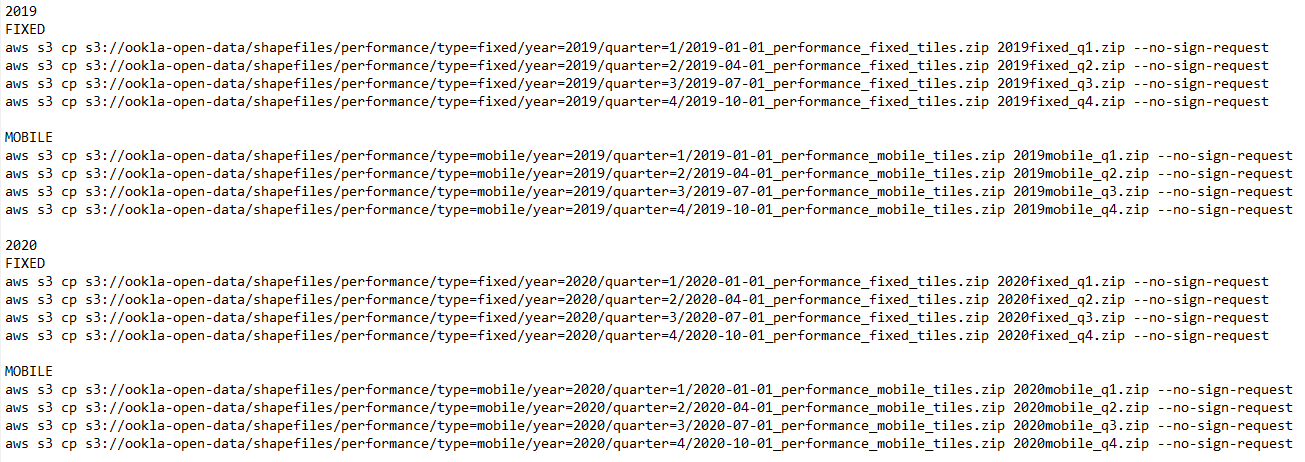






## Each shapefile's size ranges from 180 to 215 MB, concatenating every file would not be possible given the RAM limitations of our machines. We decided to do batch processing and cleaning on shapefiles for every quarter of 2019-2020.

### Import libraries to be used for this project: numpy, pandas and geopandas

In [1]:
from datetime import datetime

import geopandas as gp
import pandas as pd
import numpy as np

### Load the Philippine Boundaries from GADM.org as a GeoDataFrame (DataFrame with geometry column). For this project, we are going to use the Shapefile with Provinces Layer. We checked the DataFrame for null values and found no null values on the NAME_1 and geometry columns which is going to be used to be merged later with the Ookla data

In [2]:
pinas = gp.GeoDataFrame.from_file("gadm36_PHL_shp.zip", layer="gadm36_PHL_1")
pinas

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."
...,...,...,...,...,...,...,...,...,...,...,...
76,PHL,Philippines,PHL.77_1,Tawi-Tawi,None,None,Lalawigan|Probinsya,Province,1570,PH.TT,"MULTIPOLYGON (((119.46694 4.58694, 119.46639 4..."
77,PHL,Philippines,PHL.78_1,Zambales,None,None,Lalawigan|Probinsya,Province,155,PH.PN,"MULTIPOLYGON (((120.08285 14.75048, 120.08222 ..."
78,PHL,Philippines,PHL.79_1,Zamboanga del Norte,None,None,Lalawigan|Probinsya,Province,972,PH.ZN,"MULTIPOLYGON (((122.09467 7.53152, 122.09467 7..."
79,PHL,Philippines,PHL.80_1,Zamboanga del Sur,None,None,Lalawigan|Probinsya,Province,973,PH.ZS,"MULTIPOLYGON (((122.29816 6.87506, 122.29816 6..."


In [3]:
pinas.isnull().sum()

GID_0         0
NAME_0        0
GID_1         0
NAME_1        0
VARNAME_1    78
NL_NAME_1    81
TYPE_1        0
ENGTYPE_1     0
CC_1          0
HASC_1        0
geometry      0
dtype: int64

### Load the data from Ookla for Mobile Data. For the purpose of simplication, we are only going to show how we did the data processing and cleaning to a single quarter for the year 2020. This process would then be iterated for all the shapefiles contained in year 2019-2020

In [9]:
q1m2019 = gp.GeoDataFrame.from_file("2019mobile_q1.zip")
print(q1m2019.head())
print(q1m2019.shape)

            quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
0  1202130120303121       12503        5090          43      1        1   
1  0322113021201023       16109       11204          36     98       49   
2  3100130002212100       10325        7378          46     94       34   
3  1231213031333131        7187        2051          50    211      104   
4  0230102031111210       76282       20332          27      2        2   

                                            geometry  
0  POLYGON ((18.52844 51.91039, 18.53394 51.91039...  
1  POLYGON ((-69.91150 18.46398, -69.90601 18.463...  
2  POLYGON ((106.98486 -6.18425, 106.99036 -6.184...  
3  POLYGON ((77.33826 28.64239, 77.34375 28.64239...  
4  POLYGON ((-122.37671 38.25544, -122.37122 38.2...  
(3231245, 7)


In [10]:
q1m2019.isnull().sum()

quadkey       0
avg_d_kbps    0
avg_u_kbps    0
avg_lat_ms    0
tests         0
devices       0
geometry      0
dtype: int64

### Join the Ookla Datasets with Philippine Boundaries to get the geometries of Philippine Provinces with at least 1 tile. 

In [11]:
ph_q1m2019 = gp.sjoin(pinas[['NAME_1','geometry']], q1m2019, how="inner", predicate='intersects')
print(ph_q1m2019.head())
print(ph_q1m2019.shape)

  NAME_1                                           geometry  index_right  \
0   Abra  POLYGON ((120.77473 17.16318, 120.76637 17.159...      2887601   
0   Abra  POLYGON ((120.77473 17.16318, 120.76637 17.159...      2843797   
0   Abra  POLYGON ((120.77473 17.16318, 120.76637 17.159...      2852378   
0   Abra  POLYGON ((120.77473 17.16318, 120.76637 17.159...      2531049   
0   Abra  POLYGON ((120.77473 17.16318, 120.76637 17.159...      1078615   

            quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  
0  1323012313011023       10529        3980          54      3        1  
0  1323012313011020        6933        1892          93      1        1  
0  1323012311232330        2249         865          50      3        2  
0  1323012311233030        3804        1338          50      2        1  
0  1323012313002103        9629        5092          53     12        9  
(24985, 9)


In [12]:
ph_q1m2019.isnull().sum()

NAME_1         0
geometry       0
index_right    0
quadkey        0
avg_d_kbps     0
avg_u_kbps     0
avg_lat_ms     0
tests          0
devices        0
dtype: int64

### Next step would be to merge the data with the list of provinces and regions to in order to match a certain province to its corresponding region. 

In [13]:
phregions = pd.read_csv("provreg.csv")
phregions

,NAME_1,Region
0,Abra,CAR
1,Agusan del Norte,Region XIII
2,Agusan del Sur,Region XIII
3,Aklan,Region VI
4,Albay,Region V
...,...,...
77,Zambales,Region III
78,Zamboanga del Norte,Region IX
79,Zamboanga del Sur,Region IX
80,Zamboanga Sibugay,Region IX


In [14]:
ph_q1m2019_regions = pd.merge(ph_q1m2019,phregions, on="NAME_1", how="inner")


,NAME_1,geometry,index_right,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,Region
0,Abra,"POLYGON ((120.77473 17.16318, 120.76637 17.159...",2887601,1323012313011023,10529,3980,54,3,1,CAR
1,Abra,"POLYGON ((120.77473 17.16318, 120.76637 17.159...",2843797,1323012313011020,6933,1892,93,1,1,CAR
2,Abra,"POLYGON ((120.77473 17.16318, 120.76637 17.159...",2852378,1323012311232330,2249,865,50,3,2,CAR
3,Abra,"POLYGON ((120.77473 17.16318, 120.76637 17.159...",2531049,1323012311233030,3804,1338,50,2,1,CAR
4,Abra,"POLYGON ((120.77473 17.16318, 120.76637 17.159...",1078615,1323012313002103,9629,5092,53,12,9,CAR
...,...,...,...,...,...,...,...,...,...,...
24384,Zamboanga Sibugay,"MULTIPOLYGON (((122.85805 7.27653, 122.85837 7...",3165355,1323213121110121,6526,1907,48,1,1,Region IX
24385,Zamboanga Sibugay,"MULTIPOLYGON (((122.85805 7.27653, 122.85837 7...",2657185,1323213123013031,2756,6403,77,1,1,Region IX
24386,Zamboanga Sibugay,"MULTIPOLYGON (((122.85805 7.27653, 122.85837 7...",2649285,1323213123013012,253,683,77,1,1,Region IX
24387,Zamboanga Sibugay,"MULTIPOLYGON (((122.85805 7.27653, 122.85837 7...",1908521,1323213123013013,18483,18859,70,2,1,Region IX


### We added columns to convert the average upload and download speeds from KBPS to MBPS for the purpose of data simplification.

In [24]:
ph_q1m2019_regions['avg_d_mbps'] = ph_q1m2019_regions['avg_d_kbps'] / 1000
ph_q1m2019_regions['avg_u_mbps'] = ph_q1m2019_regions['avg_u_kbps'] / 1000
ph_q1m2019_regions.head()
ph_q1m2019_regions.shape

(24389, 12)

### We used groupby "Region" to further simplify the data into regions, and aggregate statistics to get the Mean of Upload Speed, Download Speeds and Latency, and the Sum of Number of Tests and Devices per Province. Using the aggregate function also drops the unnecessary columns in the process such as geometry and index columns and would only return specified columns in the expression. We then renamed the columns for proper presentation using array and rename function.

In [18]:
d = {'tests': 'Tests (Q1-2019)', 'devices': 'Devices (Q1-2019)', 'avg_lat_ms':'Ave Latency(ms) (Q1-2019)','avg_d_mbps':'Ave Download(Mbps) (Q1-2019)','avg_u_mbps':'Ave Upload(Mbps) (Q1-2019)'}
ph_q1m2019_regions_grp = ph_q1m2019_regions.groupby('Region').agg({'tests':'sum', 'devices':'sum','avg_lat_ms':'mean','avg_d_mbps':'mean', 'avg_u_mbps':'mean'}).rename(columns=d)
ph_q1m2019_regions_grp



,Tests (Q1-2019),Devices (Q1-2019),Ave Latency(ms) (Q1-2019),Ave Download(Mbps) (Q1-2019),Ave Upload(Mbps) (Q1-2019)
Region,,,,,
ARMM,1295,493,78.089362,9.425894,5.965306
CAR,3859,2048,68.593258,9.801103,5.639625
NCR,114782,58942,45.545124,18.043558,7.663277
Region I,7871,4058,60.132345,12.059348,6.199840
Region II,4023,2062,65.253389,11.184127,5.790260
Region III,30432,16175,57.798584,13.126023,6.716969
Region IV-A,45180,22877,55.917223,12.265577,6.333098
Region IV-B,2833,1174,64.475046,10.792100,5.329701
Region IX,2527,1224,69.071560,12.498095,6.725895


### Lastly, we exported the cleaned data for this single shapefile to csv. This file will be later concatenated to all other cleaned CSV files for all quarters.

In [26]:
ph_q1m2019_regions_grp.to_csv("ph_q1m2019_regions_grp.csv")
ph_q1m2019_regions_grp.dtypes

Tests (Q1-2019)                   int64
Devices (Q1-2019)                 int64
Ave Latency(ms) (Q1-2019)       float64
Ave Download(Mbps) (Q1-2019)    float64
Ave Upload(Mbps) (Q1-2019)      float64
dtype: object